## Question 1.c)
Download the housing price data set of Windsor City of Canada ( provided on my website link). Design a housing price predictor taking only floor area (plot size), number of bedrooms, and number of bathrooms into considerations. Out of total 546 data , you may take 70% for designing the predictor and 30% for validating the design. The predictor design should be done using the following methods:

<b>c) Design Predictor using Batch Gradient Descent Algorithm, Stochastic Gradient Algorithm and mini batch Gradient Descent algorithms (determining minibatch size is your choice- here it could be 10, 20, 30 etc.) with and without regularization and compare their performances in terms of % error in prediction.(only allowed to use the NumPy library of Python, no other functions/libraries are allowed) </b>

In [198]:
#Loading numpy
import numpy as np
import matplotlib.pyplot as plt
import random

In [199]:
#Reading Data from Housing Price data set.csv
read_data = np.genfromtxt("Housing Price data set.csv",delimiter=',')
data = np.array(read_data[1:,1:5],dtype=np.int)

**Splitting data into x and y** \
 y = Price as label \
 x = (floor Area, number of bedrooms, number of bathrooms) i.e x1,x2,x3

In [200]:

np.random.shuffle(data)     # shuffling , splitting of train and validation to unbaised
y = data[:,0:1]
x = data[:,1:]
print("Prices(top 5) :\n",y[:5])
print("\nx1,x2,x3(top 5) :\n",x[:5])

Prices(top 5) :
 [[72000]
 [62000]
 [41000]
 [55500]
 [26000]]

x1,x2,x3(top 5) :
 [[3540    2    1]
 [4075    3    1]
 [3040    2    1]
 [3780    2    1]
 [3000    2    1]]


In [201]:
#preprocessing
m,n = x.shape
ones = np.ones((m,n+1),dtype=np.int)
ones[:,1:] = x         #broadcasting
x_data = ones

#splitting data into training(70%) and validation(30%) 
split = int(m*0.7)
x_train = x_data[:split]
y_train = y[:split]
x_valid = x_data[split:]
y_valid = y[split:]
print(x.shape,x_train.shape,x_valid.shape)

(546, 3) (382, 4) (164, 4)


### Feature Scaling (using Standered Normalization)
\begin{equation}
    x' = \frac{x-\mu}{\sigma}
\end{equation}

In [202]:
m = np.mean(x_train,axis=0)
s = np.std(x_train,axis=0)+0.00001

xscale_train = (x_train-m)/s
m = np.mean(x_valid,axis=0)
s = np.std(x_valid,axis=0)+0.00001
xscale_valid = (x_valid-m)/s

In [203]:
#function for hypothesis, Loss/error and dJ/dw
def hypothesis(x,w):
    return np.dot(x,w)

def costFunction(x,y,w):
    m,n = x.shape
    return np.sum((hypothesis(x,w)-y)**2)/(2*m)

def costFunctionWithRegularization(x,y,w,lembda=0.1):
    m,n = x.shape
    return (np.sum((hypothesis(x,w)-y)**2) + (np.sum(w**2)*lembda))/(2*m)

def gradW(x,y,w):
    return ((hypothesis(x,w)-y)*x)


In [204]:
#function to plot epoch vs loss
def plotLoss(loss):
    f=plt.figure()
    plt.xlabel("--Epoch--")
    plt.ylabel("--Loss --")
    plt.title("epoch vs loss")
    plt.plot(loss)
    plt.show()

# Batch Gradient Descent 
<b>Without Regularization
\begin{equation}
    w_j = w_j - \frac{\alpha}{m} \sum _{i=1}^{i=m}(h_w(x^{(i)})-y^{(i)}) x_j
\end{equation}

<b>With Regularization</b>
\begin{equation}
    w_j =  (1-\frac{\alpha\lambda}{m})w_j- \frac{\alpha}{m} \sum _{i=1}^{i=m}(h_w(x^{(i)})-y^{(i)}) x_j
\end{equation}

In [205]:
def batchGradientDescent(x,y,regularization=False,alpha=0.1,max_epoch=200,lembda=0.1):
    m,n = x.shape
    loss = []
    w = np.ones((n,1))

    if regularization==False:
        loss.append(costFunction(x,y,w))
    else:
        loss.append(costFunctionWithRegularization(x,y,w,lembda))
    for i in range(1,max_epoch):
        dw = np.zeros((n,1))
        for xi,yi in zip(x,y):
            dw += gradW(xi,yi,w).reshape(n,1)
        if regularization==False:
            w = w - (alpha/m)*dw
            loss.append(costFunction(x,y,w))
        else:
            k = (alpha*lembda)/m
            w = (w*(1-k)) -((alpha/m)*dw)
            loss.append(costFunctionWithRegularization(x,y,w,lembda))
            
    return w,loss


### Batch gradient descent(without Regularization)

-------------alpha = 0.1


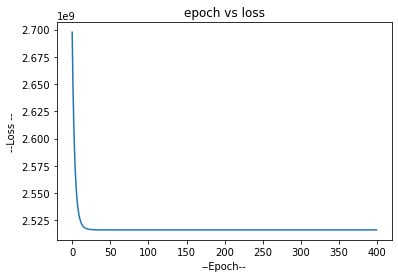


-------------alpha = 0.01


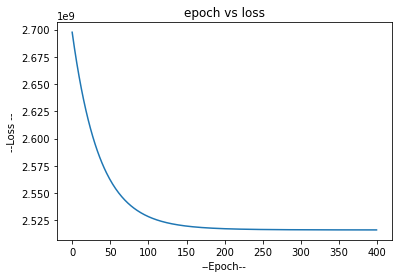


-------------alpha = 0.001


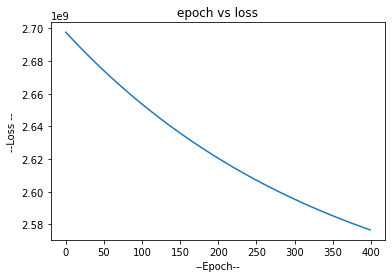


-------------alpha = 0.0001


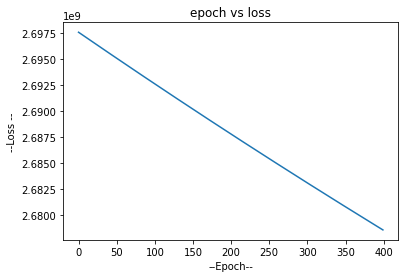

In [206]:
print("-------------alpha =",0.1)
w,loss1 =batchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.1,max_epoch=400)
plotLoss(loss1)
print("\n-------------alpha =",0.01)
w,loss =batchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.01,max_epoch=400)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =batchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.001,max_epoch=400)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =batchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.0001,max_epoch=400)
plotLoss(loss)

### Batch gradient descent(with Regularization)


-------------alpha = 0.1


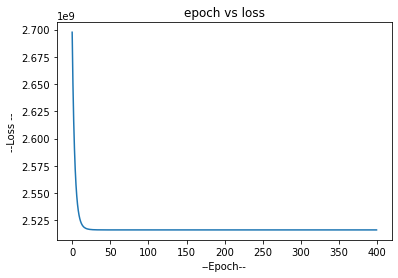


-------------alpha = 0.01


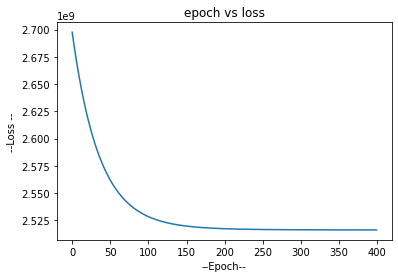


-------------alpha = 0.001


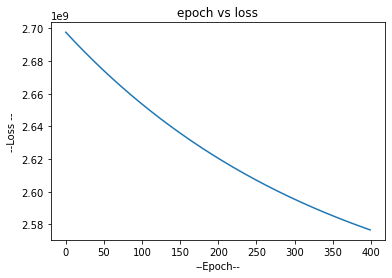


-------------alpha = 0.0001


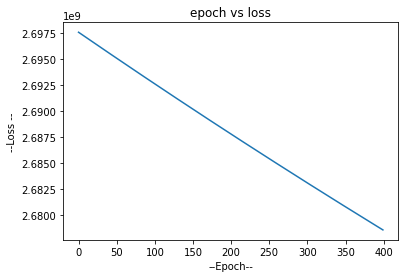

In [207]:
print("-------------alpha =",0.1)
w,loss2 =batchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.1,max_epoch=400,lembda=0.1)
plotLoss(loss2)
print("\n-------------alpha =",0.01)
w,loss =batchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.01,max_epoch=400,lembda=0.1)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =batchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.001,max_epoch=400,lembda=0.1)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =batchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.0001,max_epoch=400,lembda=0.1)
plotLoss(loss)

# Comparing  performances in terms of % error in prediction(Batch Gradient Descent)
**error1 : error in prediction (Predictor:without regularization)\
error2 : error in prediction (Predictor:with regularization)**
\begin{equation}
    \frac{error1-error2}{error1} \times 100
\end{equation}

In [237]:
def percentageError(err1,err2):
    p_err =  ((err1-err2)*100)/err1
    p_err = np.round(p_err,12)
    
    if p_err<0:
        print("Error1 < Error2 by",-p_err,"%\n")
    elif p_err==0:
        print("Error1 == Error\n")
    else:
        print("Error1 > than Error2 :",p_err,"%\n")

In [209]:
w1,loss =batchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.01,max_epoch=400)
w2,loss =batchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.01,max_epoch=400,lembda=0.1)

In [214]:
#comparing % error for different value of lembda with and without Regularization
print("Error1 : Error without Regularization")
print("Error2 : Error with Regularization\n")


print("At lembda = ",0.1)
err_w1 = costFunction(x_valid,y_valid,w1)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.1)
percentageError(err_w2,err_w1)

print("At lembda = ",0.01)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.01)
percentageError(err_w2,err_w1)

print("At lembda = ",0.001)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.001)
percentageError(err_w2,err_w1)

print("At lembda = ",0.0001)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.0001)
percentageError(err_w2,err_w1)

print("At lembda = ",0)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0)
percentageError(err_w2,err_w1)


Error1 : Error without Regularization
Error2 : Error with Regularization

At lembda =  0.1
-0.0424528914553731
Error1 < Error2 by 0.042452891455 %

At lembda =  0.01
-0.042452894447134494
Error1 < Error2 by 0.042452894447 %

At lembda =  0.001
-0.04245289474630238
Error1 < Error2 by 0.042452894746 %

At lembda =  0.0001
-0.04245289477623154
Error1 < Error2 by 0.042452894776 %

At lembda =  0
-0.04245289477955242
Error1 < Error2 by 0.04245289478 %



**Comparision**
<ul>
    <li>Loss with regularization is more than loss without regularization</li>
    <li>decreasing lembda increases the %error in prediction for regularization</li>
</ul>

# Stochastic Gradient Descent 
<b>Without Regularization
\begin{equation}
     w_j = w_j - {\alpha}(h_w(x^{(i)})-y^{(i)}) x_j
\end{equation}

<b>With Regularization</b>
\begin{equation}
    w_j =  (1-{\alpha\lambda})w_j- {\alpha}(h_w(x^{(i)})-y^{(i)}) x_j
\end{equation}

In [239]:
def stochasticGradientDescent(x,y,regularization=False,alpha=0.1,max_epoch=400,lembda=0.1):
    m,n = x.shape
    loss = []
    w = np.random.random((n,1))
    if regularization==False:
        loss.append(costFunction(x,y,w))
    else:
        loss.append(costFunctionWithRegularization(x,y,w,lembda))
        
    for _ in range(1,max_epoch):
        one = np.ones((m,n+1))
        one[:,:-1] = x[:,:]
        one[:,-1:] = y[:,:]
        np.random.shuffle(one) 
        x = one[:,:-1]
        y = one[:,-1:]
        dw = np.zeros((n,1))
        for xi,yi in zip(x,y):
            dw += gradW(xi,yi,w).reshape(n,1)
            if regularization==False:
                w = w - (alpha/m)*dw
            else:
                k = alpha*lembda
                w = (w*(1-k)) -((alpha)*dw)
                
        if regularization==False:
            loss.append(costFunction(x,y,w))
        else:
            loss.append(costFunctionWithRegularization(x,y,w,lembda))
    return w,loss

### Stochastic Gradient descent(without Regularization)

-------------alpha = 0.1


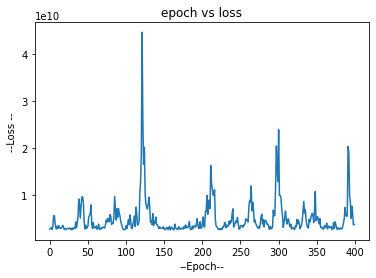


-------------alpha = 0.01


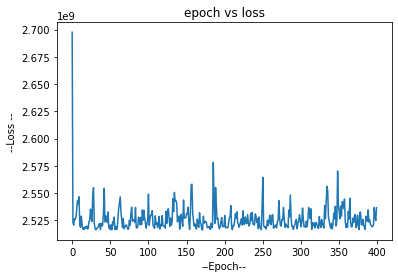


-------------alpha = 0.001


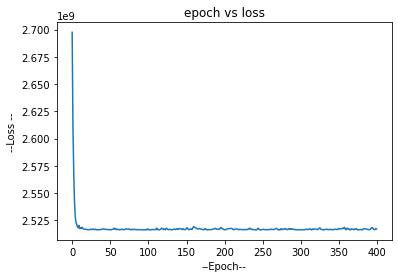


-------------alpha = 0.0001


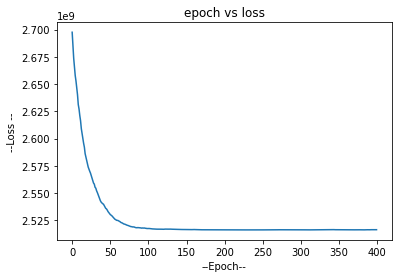

In [224]:
print("-------------alpha =",0.1)
w,loss =stochasticGradientDescent(xscale_train,y_train,regularization=False,alpha=0.1,max_epoch=400)
plotLoss(loss)
print("\n-------------alpha =",0.01)
w,loss =stochasticGradientDescent(xscale_train,y_train,regularization=False,alpha=0.01,max_epoch=400)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =stochasticGradientDescent(xscale_train,y_train,regularization=False,alpha=0.001,max_epoch=400)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =stochasticGradientDescent(xscale_train,y_train,regularization=False,alpha=0.0001,max_epoch=400)
plotLoss(loss)

### Stochastic Gradient descent(with Regularization)


-------------alpha = 0.0001
2697625422.001547


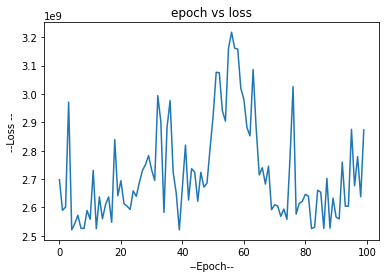


-------------alpha = 1e-05
2697628686.4919987


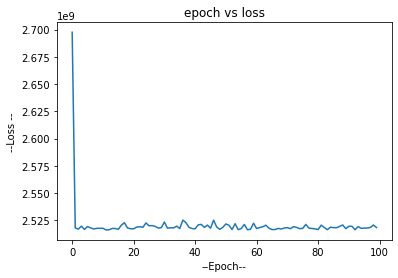


-------------alpha = 1e-06
2697614547.680493


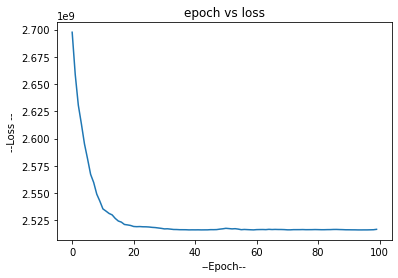

In [235]:

print("\n-------------alpha =",0.0001)
w,loss =stochasticGradientDescent(xscale_train,y_train,regularization=True,alpha=0.0001,max_epoch=100,lembda=0.1)
plotLoss(loss)
print("\n-------------alpha =",0.00001)
w,loss =stochasticGradientDescent(xscale_train,y_train,regularization=True,alpha=0.00001,max_epoch=100,lembda=0.1)
plotLoss(loss)

print("\n-------------alpha =",0.000001)
w,loss =stochasticGradientDescent(xscale_train,y_train,regularization=True,alpha=0.000001,max_epoch=100,lembda=0.1)
plotLoss(loss)

# Comparing  performances in terms of % error in prediction
<h2>(Stochastic Gradient Descent)</h2> 

**error1 : error in prediction (Predictor:without regularization)\
error2 : error in prediction (Predictor:with regularization)**
\begin{equation}
    \frac{error1-error2}{error1} \times 100
\end{equation}

In [240]:
w1,loss =stochasticGradientDescent(xscale_train,y_train,regularization=False,alpha=0.0001,max_epoch=100)
w2,loss =stochasticGradientDescent(xscale_train,y_train,regularization=True,alpha=0.00001,max_epoch=100,lembda=0.1)

#comparing % error for different value of lembda with and without Regularization
print("Error1 : Error without Regularization")
print("Error2 : Error with Regularization\n")


print("At lembda = ",0.1)
err_w1 = costFunction(x_valid,y_valid,w1)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.1)
percentageError(err_w2,err_w1)

print("At lembda = ",0.01)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.01)
percentageError(err_w2,err_w1)

print("At lembda = ",0.001)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.001)
percentageError(err_w2,err_w1)

print("At lembda = ",0.0001)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.0001)
percentageError(err_w2,err_w1)

print("At lembda = ",0)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0)
percentageError(err_w2,err_w1)

Error1 : Error without Regularization
Error2 : Error with Regularization

At lembda =  0.1
Error1 > than Error2 : 22.455410167526 %

At lembda =  0.01
Error1 > than Error2 : 22.455410164978 %

At lembda =  0.001
Error1 > than Error2 : 22.455410164723 %

At lembda =  0.0001
Error1 > than Error2 : 22.455410164697 %

At lembda =  0
Error1 > than Error2 : 22.455410164694 %



**Comparision**
<ul>
    <li>Loss with regularization is less  than loss without regularization</li>
</ul>

# Mini-Batch Gradient Descent
<b> Without Regularization </b>
\begin{equation}
    w_j = w_j - \frac{\alpha}{b} \sum _{i=1}^{i=b}(h_w(x^{(i)})-y^{(i)}) x_j
\end{equation}

<b> With Regularization </b>
\begin{equation}
    w_j = (1-\frac{\alpha \lambda}{b})w_j - \frac{\alpha}{b} \sum _{i=1}^{i=b}(h_w(x^{(i)})-y^{(i)}) x_j
\end{equation}

In [228]:
def getBatch(x,y,batch_size=10):
    m,n = x.shape
    n_batch = m//batch_size
    m_new = n_batch*batch_size
    x_batch = x[:m_new]
    y_batch = y[:m_new]
    batches=[]
    i=0
    while i<m_new:
        x_mini_batch = x_batch[i:i+batch_size,:]
        y_mini_batch = y_batch[i:i+batch_size,:]
        batches.append([x_mini_batch,y_mini_batch])
        i += batch_size
    return batches


def miniBatchGradientDescent(x,y,regularization=False,alpha=0.1,max_epoch=200,batch_size=10,lembda=0.1):
    m,n = x.shape
    loss = []
    w = np.ones((n,1))
    if regularization==False:
        loss.append(costFunction(x,y,w))
    else:
        loss.append(costFunctionWithRegularization(x,y,w,lembda))
    batches = getBatch(x,y,batch_size)
    for _ in range(1,max_epoch):
        random.shuffle(batches)
        for batch in batches:
            dw = np.zeros((n,1))
            for xi,yi in zip(batch[0],batch[1]):
                dw += gradW(xi,yi,w).reshape(n,1)
            if regularization==False:
                w = w - (alpha/batch_size)*dw
            else:
                k = (alpha*lembda)/batch_size
                w = (w*(1-k)) -((alpha/batch_size)*dw)
        if regularization==False:
            loss.append(costFunction(x,y,w))
        else:
            loss.append(costFunctionWithRegularization(x,y,w,lembda))
    return w,loss

b=getBatch(x_train[:20],y_train[:20],10)

### Mini-Batch Gradient Descent (without Regularization)

-------------alpha = 0.1


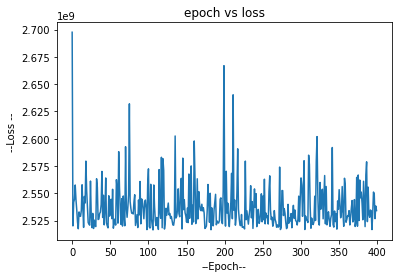


-------------alpha = 0.01


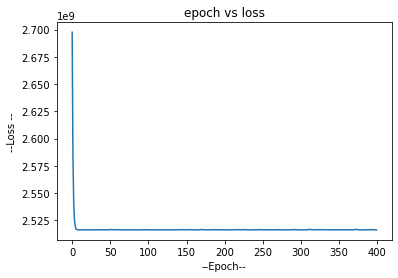


-------------alpha = 0.001


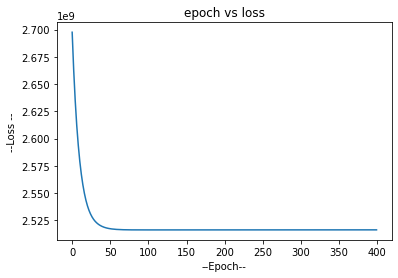


-------------alpha = 0.0001


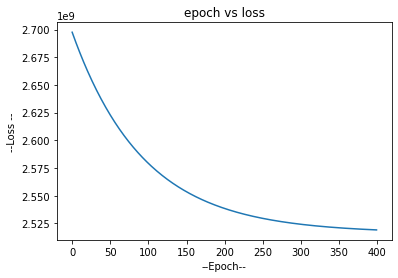

In [229]:
print("-------------alpha =",0.1)
w,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.1,max_epoch=400,batch_size=10)
plotLoss(loss)
print("\n-------------alpha =",0.01)
w,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.01,max_epoch=400,batch_size=10)
plotLoss(loss)
print("\n-------------alpha =",0.001)
w,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.001,max_epoch=400,batch_size=10)
plotLoss(loss)
print("\n-------------alpha =",0.0001)
w,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.0001,max_epoch=400,batch_size=10)
plotLoss(loss)

### Mini-Batch(with Regularization)

-------------alpha = 0.1


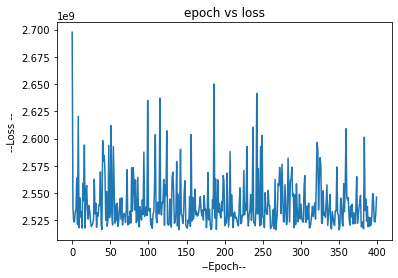


-------------alpha = 0.01


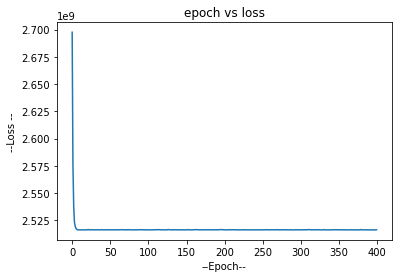


-------------alpha = 0.001


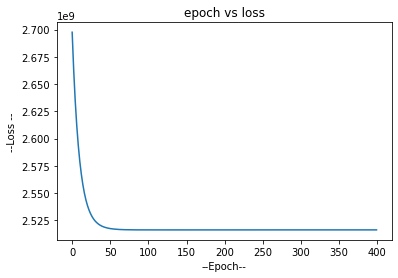


-------------alpha = 0.0001


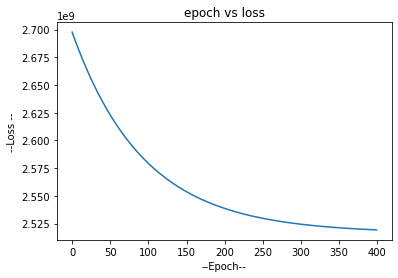

In [230]:
print("-------------alpha =",0.1)
w,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.1,max_epoch=400,batch_size=10,lembda=0.1)
plotLoss(loss)

print("\n-------------alpha =",0.01)
w,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.01,max_epoch=400,batch_size=10,lembda=0.1)
plotLoss(loss)

print("\n-------------alpha =",0.001)
w,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.001,max_epoch=400,batch_size=10,lembda=0.1)
plotLoss(loss)

print("\n-------------alpha =",0.0001)
w,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.0001,max_epoch=400,batch_size=10,lembda=0.1)
plotLoss(loss)

# Comparing  performances in terms of % error in prediction
<h2>(Mini - Batch Gradient Descent)</h2> 

**error1 : error in prediction (Predictor:without regularization)\
error2 : error in prediction (Predictor:with regularization)**
\begin{equation}
    \frac{error1-error2}{error1} \times 100
\end{equation}

In [241]:
w1,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=False,alpha=0.01,max_epoch=400,batch_size=10)
w2,loss =miniBatchGradientDescent(xscale_train,y_train,regularization=True,alpha=0.01,max_epoch=400,batch_size=10,lembda=0.1)


#comparing % error for different value of lembda with and without Regularization
print("Error1 : Error without Regularization")
print("Error2 : Error with Regularization\n")


print("At lembda = ",0.1)
err_w1 = costFunction(x_valid,y_valid,w1)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.1)
percentageError(err_w2,err_w1)

print("At lembda = ",0.01)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.01)
percentageError(err_w2,err_w1)

print("At lembda = ",0.001)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.001)
percentageError(err_w2,err_w1)

print("At lembda = ",0.0001)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0.0001)
percentageError(err_w2,err_w1)

print("At lembda = ",0)
err_w2 = costFunctionWithRegularization(x_valid,y_valid,w2,lembda=0)
percentageError(err_w2,err_w1)

Error1 : Error without Regularization
Error2 : Error with Regularization

At lembda =  0.1
Error1 < Error2 by 1.572917972269 %

At lembda =  0.01
Error1 < Error2 by 1.57291797524 %

At lembda =  0.001
Error1 < Error2 by 1.572917975537 %

At lembda =  0.0001
Error1 < Error2 by 1.572917975566 %

At lembda =  0
Error1 < Error2 by 1.57291797557 %



**Comparision**
<ul>
    <li>Loss with regularization is more than loss without regularization</li>
    <li>decreasing lembda increases the %error in prediction for regularization</li>
</ul>

### Observation:
<ul>
    <li>There is very less effect in %error prediction with or without regularization</li>
    <li>Stochastic Gradient have has different behaviour,(loss changes) compared to mini-batch and bactch GD</li>
</ul>